__Reshaping__

In [1]:
import pandas as pd

In [2]:
olympics = pd.read_csv('olympics.csv', skiprows=4)

In [3]:
olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


__Athletes winning medals in Beijing Olympics 100m or 200m track event__

In [4]:
m_08 = olympics[(olympics.Edition == 2008) & 
         ((olympics.Event == '100m') |
         (olympics.Event == '200m'))]

In [5]:
go = m_08.groupby(['NOC','Gender','Discipline','Event']).size()

In [6]:
go

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

In [7]:
df = go.unstack(['Discipline','Event'])

In [8]:
df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

__Using stack()__ 

In [9]:
df.stack()

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

In [10]:
df.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

__Using unstack()__

In [11]:
df.unstack('Gender')

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

## Challenge

__Plot the number of gold medals won by the US male and female athletes throughout the history of the Olympics?__

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
olympics.NOC.value_counts()

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
CAN     592
NOR     537
POL     499
DEN     491
FRG     490
KOR     466
FIN     451
YUG     435
BEL     408
CUB     395
ESP     377
SUI     376
BRA     372
BUL     331
TCH     329
       ... 
MOZ       2
ZAM       2
KSA       2
QAT       2
SUR       2
TAN       2
SRI       2
LUX       2
VIE       2
ECU       2
DJI       1
AFG       1
AHO       1
BAR       1
KUW       1
BER       1
GUY       1
SEN       1
MRI       1
UAE       1
SUD       1
MKD       1
NIG       1
ERI       1
BDI       1
TGA       1
TOG       1
ISV       1
IRQ       1
CIV       1
Name: NOC, Length: 138, dtype: int64

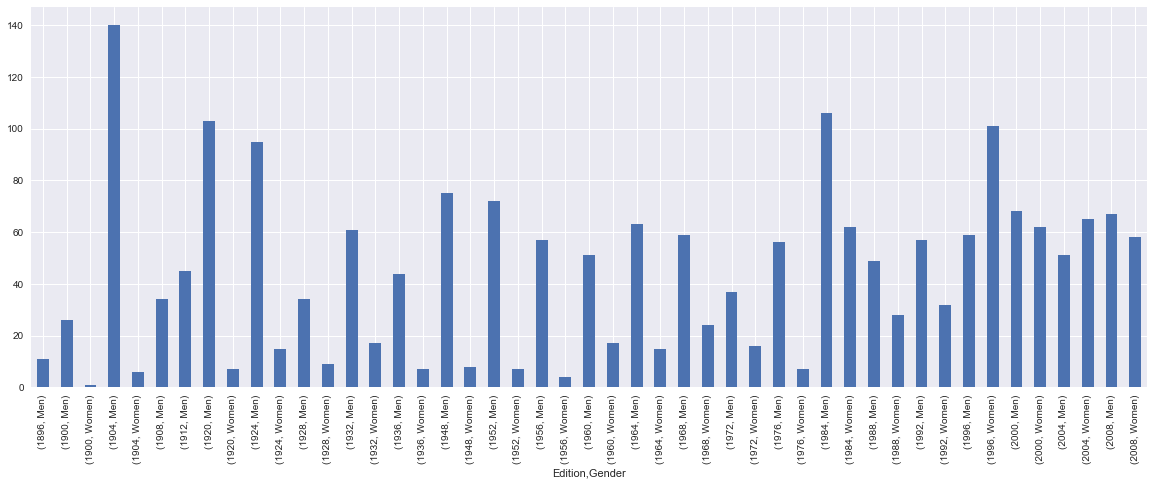

In [14]:
olympics[(olympics.NOC == 'USA') & (olympics.Medal == 'Gold')].groupby(['Edition','Gender']).size().plot(kind='bar', figsize=(20,7));

In [15]:
us = olympics[(olympics.NOC == 'USA') & (olympics.Medal == 'Gold')]

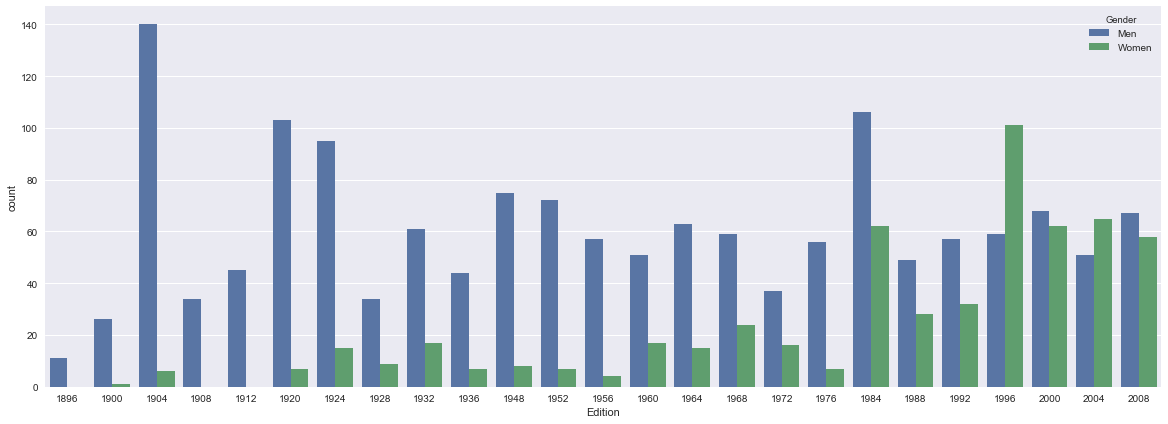

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(x='Edition', hue='Gender', data=us);

__Plot the five athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals, and the bronze medals.__

In [17]:
olympics.groupby(['Athlete','Medal']).agg({'Medal':'count'})

Medal
Athlete                    Medal        
AABYE, Edgar               Gold        1
AALTONEN, Arvo Ossian      Bronze      2
AALTONEN, Paavo Johannes   Bronze      2
                           Gold        3
AAMODT, Ragnhild           Gold        1
AANING, Alf Lied           Silver      1
AARDENBURG, Willemien      Bronze      1
AARDEWIJN, Pepijn          Silver      1
AARONES, Ann Kristin       Bronze      1
AAS, Karl Jan              Silver      1
AAS, Thomas Valentin       Gold        1
ABAJO, Jose Luis           Bronze      1
ABAKUMOVA, Maria           Silver      1
ABALMASAU, Aliaksei        Gold        1
ABALO, Luc                 Gold        1
ABANDA ETONG, Patrice      Gold        1
ABARCA, Jose Maria         Gold        1
ABAS, Stephen              Silver      1
ABASCAL GARCIA, Alejandro  Gold        1
ABASCAL GOMEZ, Jose Manuel Bronze      1
ABASSOVA, Tamilla          Silver      1
ABATI, Joel                Gold        1
ABAY, Peter                Silver      1
ABAY-NEMES, Oszkar         Bronze      1
ABBA, Silvano              Bronze      1
ABBAGNALE, Agostino        Gold        3
ABBAGNALE, Carmine         Gold        2
                           Silver      1
ABBAGNALE, Giuseppe        Gold        2
                           Silver      1
...                                  ...
ZWERVER, Ronald            Silver      1
ZWIERS, Claudia            Bronze      1
ZWOLINSKI, Krzysztof       Silver      1
ZWOLLE, Hendrik Jan        Bronze      1
                           Gold        1
ZYBINA, Galina             Bronze      1
                           Gold        1
                           Silver      1
ZYCH, Boguslaw             Bronze      1
ZYKINA, Olesya             Bronze      1
                           Silver      1
ZÄHRINGER, Klaus           Bronze      1
ZÜHLKE, Steffen            Bronze      1
ZÜLOW, Andreas             Gold        1
ZÜRNER, Albert             Gold        1
                           Silver      1
ÖRSTED, Hans-Henrik        Bronze      1
ÖRTEGREN, Ruben            Silver      1
ÖRVIG, Erik                Gold        1
ÖRVIG, Olav                Gold        1
ÖRVIG, Thor                Gold        1
ÖSTENSEN, Östen            Bronze      2
                           Silver      3
ÖSTERVOLD, Henrik          Gold        1
ÖSTERVOLD, Jan Olsen       Gold        1
ÖSTERVOLD, Kristian Olsen  Gold        1
ÖSTERVOLD, Ole Olsen       Gold        1
ÖSTMO, Ole                 Bronze      2
                           Silver      2
ÖSTRAND, Per-Olof          Bronze      1

[25127 rows x 1 columns]

In [18]:
df = olympics.groupby(['Athlete','Medal']).size().unstack('Medal', fill_value=0)

In [19]:
df.head()

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1


In [20]:
top = df.sort_values(by=['Gold','Silver','Bronze'], ascending=False)[['Gold','Silver','Bronze']]

In [21]:
top.head()

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


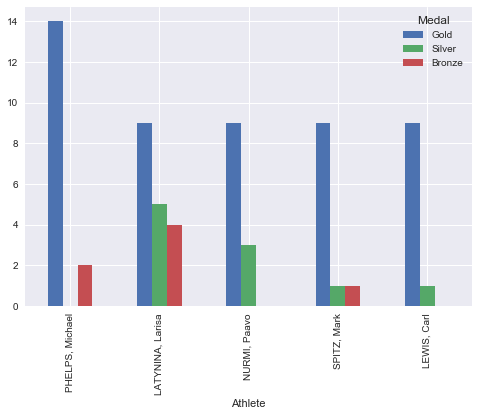

In [22]:
top.head().plot(kind='bar');